# Ex3: Fitting spiky responses

The Vector Fitting feature is demonstrated using a 4-port example network copied from the scikit-rf `tests` folder. This network is a bit tricky to fit because of its many resonances in the individual response. Additional explanations and background information can be found in the [Vector Fitting tutorial](../../tutorials/VectorFitting.ipynb).

In [1]:
import skrf
import numpy as np
import matplotlib.pyplot as mplt

To create a `VectorFitting` instance, a `Network` containing the frequency responses of the N-port is passed. In this example a copy of `Agilent_E5071B.s4p` from the `skrf/tests` folder is used:

In [2]:
nw = skrf.network.Network('./Agilent_E5071B.s4p')
vf = skrf.VectorFitting(nw)

Now, the vector fit can be performed. The number and type of poles has to be specified, which depends on the *behaviour* of the responses. As a rule of thumb for an initial guess, one can count the number of resonances or "bumps" in the individual responses. In this case, the 4-port network has 16 responses to be fitted. As shown in the magnitude plots below, $S_{11}$ and some other responses are quite *spiky* and have roughly 15 local maxima each and about the same number of local minima in between. Other responses have only 5-6 local maxima, or they are very noisy with very small magnitudes (like $S_{24}$ and $S_{42}$). Assuming that most of the 15 maxima of $S_{11}$ occur at the same frequencies as the maxima of the other responses, one can expect to require 15 complex-conjugate poles for a fit. As this is probably not completely the case, trying with 20-30 poles should be a good start to fit all of the resonances in all of the responses.

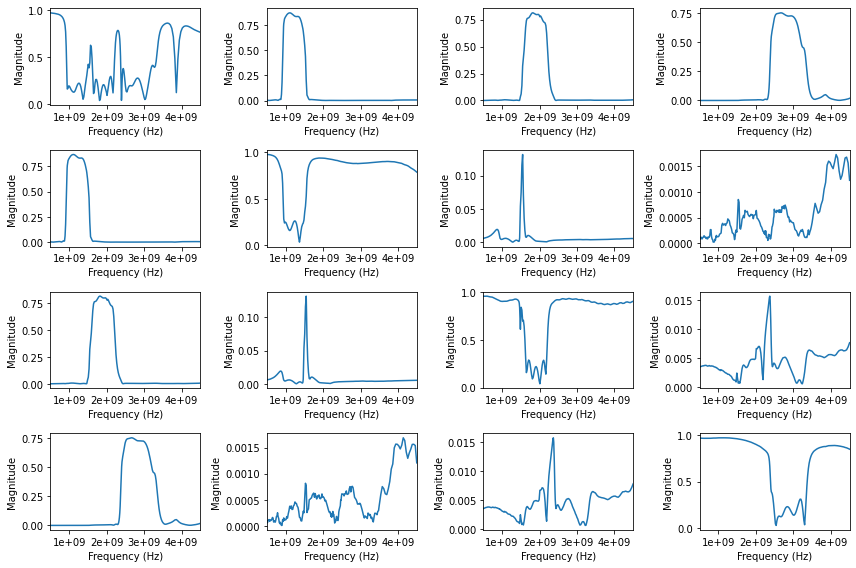

In [3]:
# plot magnitudes of all 16 responses in the 4-port network
fig, ax = mplt.subplots(4, 4)
fig.set_size_inches(12, 8)
for i in range(4):
    for j in range(4):
        nw.plot_s_mag(i, j, ax=ax[i][j])
        ax[i][j].get_legend().remove()
fig.tight_layout()
mplt.show()

After trying different numbers of real and complex-conjugate poles, the following setup was found to result in a very good fit. Other setups also work well (e.g. 0-2 real poles and 25-26 cc poles):

In [4]:
vf.vector_fit(n_poles_real=1, n_poles_cmplx=26)

The convergence can also be checked with the convergence plot:

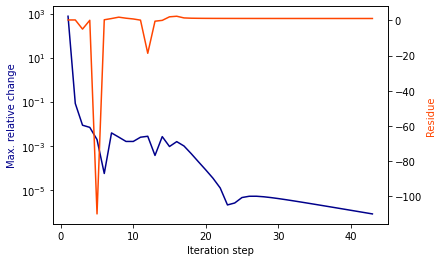

In [5]:
vf.plot_convergence()

The fitted model parameters are now stored in the class attributes `poles`, `residues`, `proportional_coeff` and `constant_coeff` for further use. To verify the result, the fitted model responses can be compared to the original network responses. As the model will return a response at any given frequency, it makes sense to also check its response outside the frequency range of the original samples. In this case, the original network was measured from 0.5 GHz to 4.5 GHz, so we can plot the fit from dc to 10 GHz:

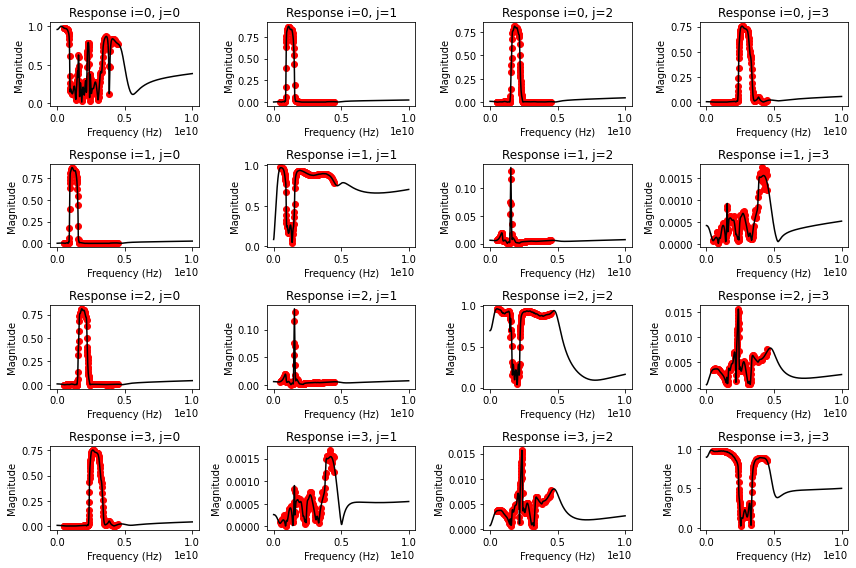

In [6]:
freqs = np.linspace(0, 10e9, 501)
fig, ax = mplt.subplots(4, 4)
fig.set_size_inches(12, 8)
for i in range(4):
    for j in range(4):
        vf.plot_s_mag(i, j, freqs=freqs, ax=ax[i][j])
        ax[i][j].get_legend().remove()
fig.tight_layout()
mplt.show()

In [7]:
vf.get_rms_error()

0.00899478522435358

As shown in the plots, a very good fit was achieved. This is also indicated with the low rms error of less than 0.01. To use the model in a circuit simulation, an equivalent circuit can be created based on the fitting parameters. This is currently only implemented for SPICE, but the structure of the equivalent circuit can be adopted to any kind of circuit simulator.

`vf.write_spice_subcircuit_s('/home/vinc/Desktop/4-port_model.sp')`

The exported `.sp` file can then be imported into SPICE as a subcircuit. Have a look at the [Ring Slot Example](./vectorfitting_ex1_ringslot.ipynb).